X_train shape: (1213, 45, 1)
y_train shape: (1213,)
--------------------------------------------------
Number of test prices to predict (y_real): 20
X_test shape: (20, 45, 1)
--------------------------------------------------
Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 45, 30)         │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 45, 30)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 45, 30)         │         7,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 45, 30)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 30)             │         7,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,511 (72.31 KB)

 Trainable params: 18,511 (72.31 KB)

 Non-trainable params: 0 (0.00 B)

--------------------------------------------------
Starting Model Training...
Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - loss: 0.0350
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0092
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0052
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0061
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0057
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0039
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0033
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0045
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0046
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - loss: 0.0057
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0037
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0030
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0046
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 56m

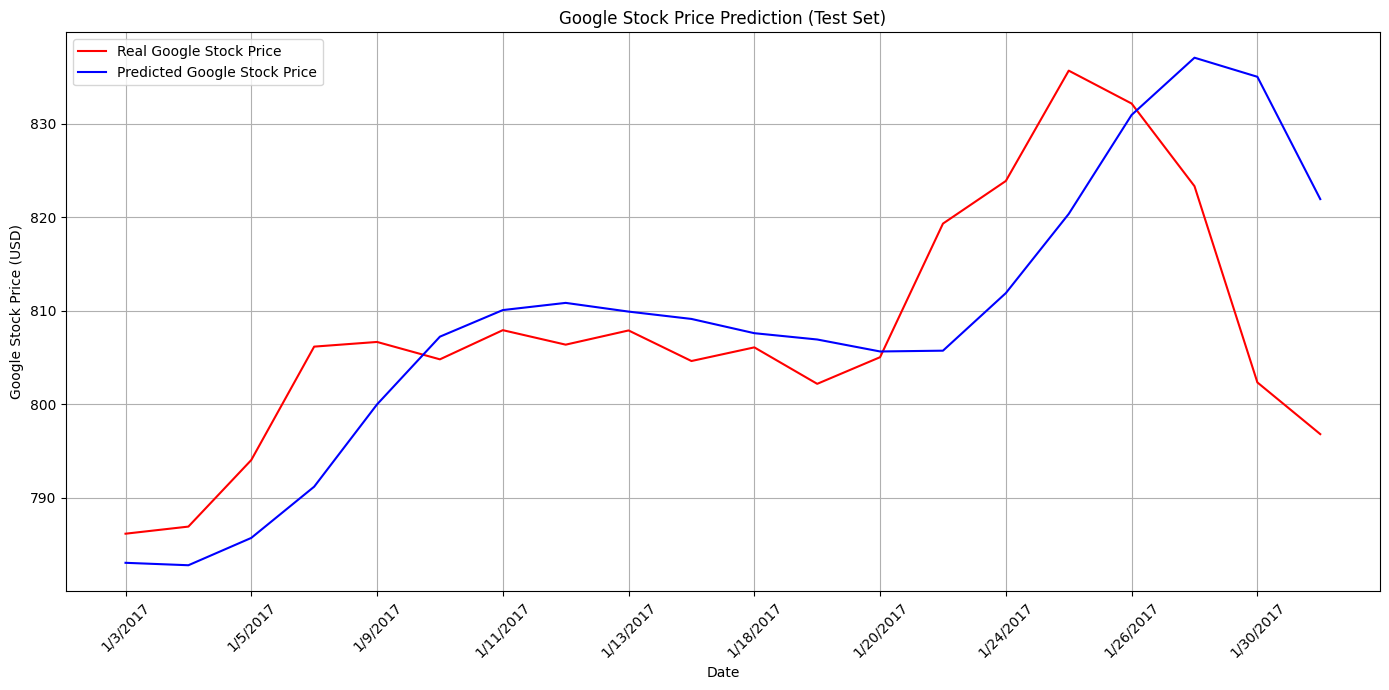

Root Mean Squared Error (RMSE): $12.0409


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# --- 1. Data Loading and Preprocessing ---

# Load the datasets
# Assuming the files are in the same directory as the script or notebook
df_train = pd.read_csv('Google_Stock_Price_Train.csv')
df_test = pd.read_csv('Google_Stock_Price_Test.csv')

# Clean numerical columns by removing commas and converting to float
def clean_numeric_columns(df, columns):
    for col in columns:
        if col in df.columns:
            df[col] = df[col].astype(str).str.replace(',', '', regex=False).astype(float)
    return df

numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
df_train = clean_numeric_columns(df_train, numeric_cols)
df_test = clean_numeric_columns(df_test, numeric_cols)

# Use only the 'Close' price for the prediction
training_set = df_train[['Close']].values

# Feature Scaling: Normalize the data
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Define the sequence length (timesteps)
TIME_STEPS = 45

## Constructing Training Dataset (X_train and y_train)
X_train = []
y_train = []
# The loop starts at TIME_STEPS (45) to ensure we have 45 previous days of data
# The loop ends at the end of the training_set_scaled array
for i in range(TIME_STEPS, len(training_set_scaled)):
    # X_train: 45 consecutive business day market close prices
    X_train.append(training_set_scaled[i-TIME_STEPS:i, 0])
    # y_train: the next business day market close price
    y_train.append(training_set_scaled[i, 0])

# Convert lists to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape X_train for LSTM: [samples, timesteps, features]
# For this problem: [1210 samples, 45 timesteps, 1 feature]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print("-" * 50)

# --- 2. Constructing the Test Dataset ---

# To predict the 20 test prices, we need the last TIME_STEPS (45) prices from the
# training data, plus the 'Close' prices from the test data itself (for prediction input).

# Get the real 'Close' prices for the test data (y_real)
real_stock_price = df_test[['Close']].values
y_real = real_stock_price.flatten()
print(f"Number of test prices to predict (y_real): {len(y_real)}")

# Concatenate the training and test data 'Close' columns
# This is necessary to get the 45 previous days for the first prediction
df_total = pd.concat((df_train['Close'], df_test['Close']), axis=0)

# Extract the input data for the test predictions
# We need data starting from (End of Training) - TIME_STEPS + 1
# Total length of training data: len(df_train)
# Test set length: len(df_test) (which is 20)
inputs = df_total[len(df_total) - len(df_test) - TIME_STEPS:].values
inputs = inputs.reshape(-1, 1)

# Scale the inputs using the SAME scaler (sc) fitted on the training data
inputs = sc.transform(inputs)

# Constructing Test Dataset (X_test)
X_test = []
# Loop starts at TIME_STEPS to ensure the first element (index 45) is the first prediction day
for i in range(TIME_STEPS, TIME_STEPS + len(df_test)):
    # Each prediction uses the 45 previous prices
    X_test.append(inputs[i-TIME_STEPS:i, 0])

# Convert to numpy array and reshape for LSTM
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(f"X_test shape: {X_test.shape}")
print("-" * 50)

# --- 3. Constructing and Training the LSTM Model ---

# Initialize the Sequential model
regressor = Sequential()

# First LSTM layer with Dropout
regressor.add(LSTM(units=30, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

# Second LSTM layer with Dropout
regressor.add(LSTM(units=30, return_sequences=True))
regressor.add(Dropout(0.1))

# Third LSTM layer with Dropout
# return_sequences=False for the last LSTM layer before the Dense output layer
regressor.add(LSTM(units=30))
regressor.add(Dropout(0.1))

# Output layer (Dense)
# One output unit for the next day's predicted price
regressor.add(Dense(units=1))

# Compile the model
regressor.compile(optimizer='adam', loss='mean_squared_error')
print("Model Summary:")
regressor.summary()
print("-" * 50)

# Train the model
print("Starting Model Training...")
regressor.fit(X_train, y_train, epochs=100, batch_size=32)
print("Model Training Complete.")
print("-" * 50)

# --- 4. Prediction and Inverse Scaling ---

# Make predictions on the test set
predicted_stock_price_scaled = regressor.predict(X_test)

# Inverse transform the scaled predictions to get the real dollar values
predicted_stock_price = sc.inverse_transform(predicted_stock_price_scaled)

# Flatten the array for easy printing/plotting
predicted_stock_price_flat = predicted_stock_price.flatten()

# --- 5. Print out the 20 Predictions ---
print("Predicted 20 Market Close Prices (Test Data):")
for i, price in enumerate(predicted_stock_price_flat):
    date = df_test['Date'].iloc[i]
    # Use f-string formatting to present the price neatly
    print(f"Day {i+1} ({date}): ${price:.2f}")

print("-" * 50)

# --- 6. Plot the Predicted vs. Real Close Price ---

plt.figure(figsize=(14, 7))
plt.plot(df_test['Date'], real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(df_test['Date'], predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction (Test Set)')
plt.xlabel('Date')
plt.ylabel('Google Stock Price (USD)')
plt.xticks(np.arange(0, len(df_test), 2), rotation=45) # Show fewer x-ticks for clarity
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Print Final Metrics (Optional but helpful) ---
from sklearn.metrics import mean_squared_error
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_real, predicted_stock_price_flat))
print(f"Root Mean Squared Error (RMSE): ${rmse:.4f}")